<h1>Notebook - do seminário final Ciência de dados</h1>
<h2><b>Tema:</b> Análise de churn (cancelamento de clientes) - grupo 03</h2>

In [58]:
#import das bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report,roc_curve,auc,RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
#Carregando a base de dados
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
# Limpeza inicial da base de dados
# converter passando strings vazias
# remover registros sem TotalCharges
# tranformar a coluna SeniorCitizen em string para a analise
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  
df.dropna(subset=['TotalCharges'], inplace=True)  
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [61]:
# Verificando a distribuição dos cancelamentos 
# yes -> cliente cancelou o serviço no ultimo mês
# no -> cliente não cancelou no ultimo mês

distribuicaoAlvo = df['Churn'].value_counts(normalize=True)
distribuicaoAlvo

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

In [62]:
# Estatísticas numéricas
# primeiro tenure (tempo de contrato)
num_feats = ['tenure']

df.groupby('Churn')[num_feats].describe()

tenure                                                   
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

<h3>50% dos usuários que cancelaram o serviço tem até 10 meses de contrato, indicando que os usuários tem a tendência a cancelar o serviço antes termino do primeiro ano, em contraste com os usuários que não cancelaram, na casa dos 38 meses, ou três anos. Reforçando ainda mais essa idéia, 75% dos clientes que cancelaram tinham até 29 meses de contrato.</h3>


In [63]:
# Estatísticas numéricas
# Cobranças mensais 
num_feats = ['MonthlyCharges']

df.groupby('Churn')[num_feats].describe()

MonthlyCharges                                                     \
               count       mean        std    min    25%    50%     75%   
Churn                                                                     
No            5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475   
Yes           1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200   

               
          max  
Churn          
No     118.75  
Yes    118.35

<h3>O valor das cobranças mensais permanece maior em todos os quartis dos usuários que cancelaram o serviço, indicando que o custo dos planos iniciais ou de entrada falha em manter os usuários no serviço.</h3>

In [64]:
# Estatísticas numéricas
# Cobranças totais
num_feats = ['TotalCharges']

df.groupby('Churn')[num_feats].describe()

TotalCharges                                                     \
             count         mean          std    min      25%      50%   
Churn                                                                   
No          5163.0  2555.344141  2329.456984  18.80  577.825  1683.60   
Yes         1869.0  1531.796094  1890.822994  18.85  134.500   703.55   

                          
            75%      max  
Churn                     
No     4264.125  8672.45  
Yes    2331.300  8684.80

<h3>O valor das cobranças totais permanece muito inferior nos usuários que cancelaram o serviço, indicando a baixa retenção de usuários novos</h3>

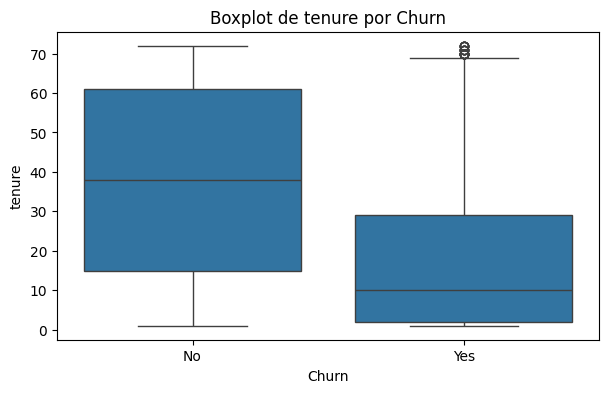

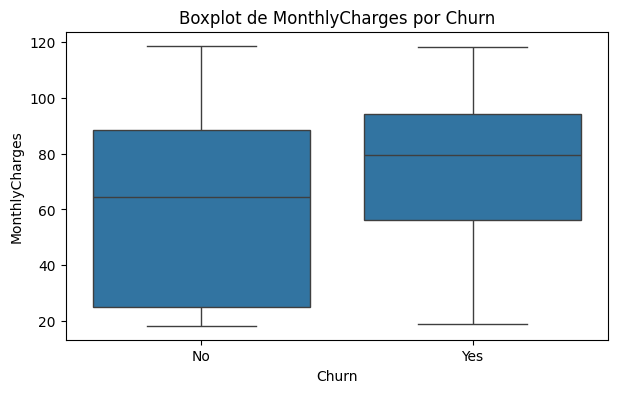

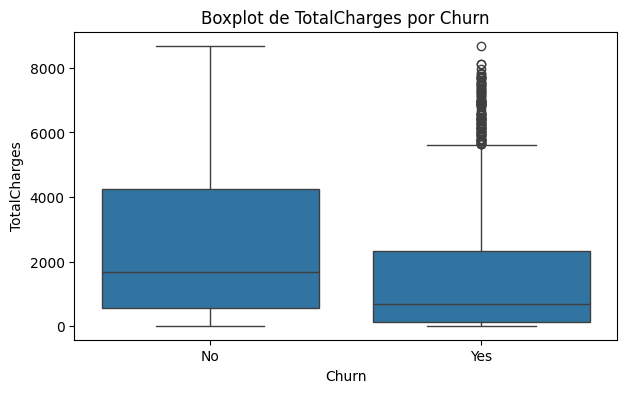

In [65]:
# Distribuição dos valores em boxplot

num_feats = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feat in num_feats:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='Churn', y=feat, data=df)
    plt.title(f'Boxplot de {feat} por Churn')
    plt.show()


Churn rate por categoria em: gender
Churn          No        Yes
gender                      
Female  73.040482  26.959518
Male    73.795435  26.204565


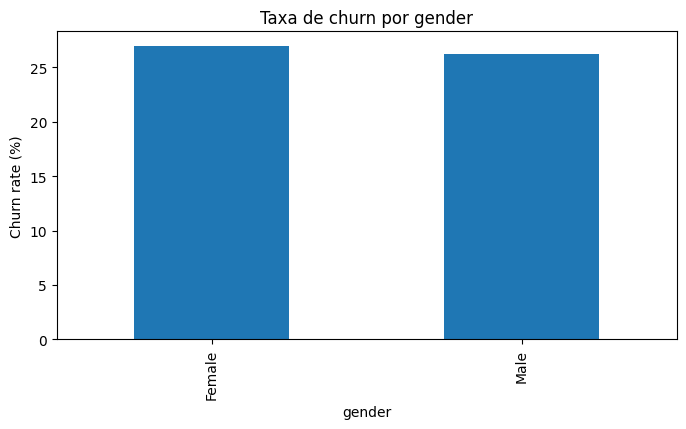


Churn rate por categoria em: SeniorCitizen
Churn                 No        Yes
SeniorCitizen                      
1              58.318739  41.681261
0              76.349745  23.650255


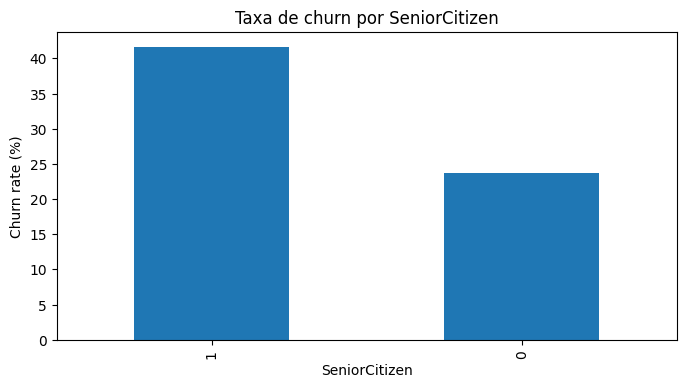


Churn rate por categoria em: Partner
Churn           No        Yes
Partner                      
No       67.023908  32.976092
Yes      80.282935  19.717065


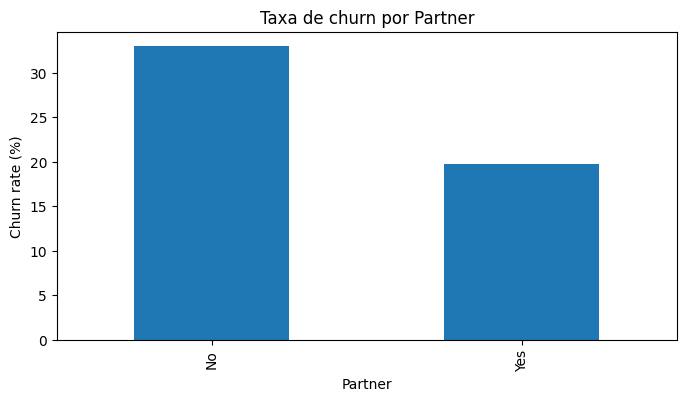


Churn rate por categoria em: Dependents
Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.468795  15.531205


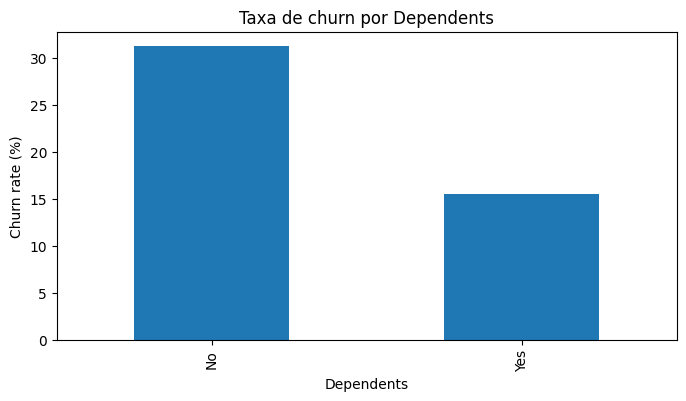


Churn rate por categoria em: PhoneService
Churn                No        Yes
PhoneService                      
Yes           73.252519  26.747481
No            75.000000  25.000000


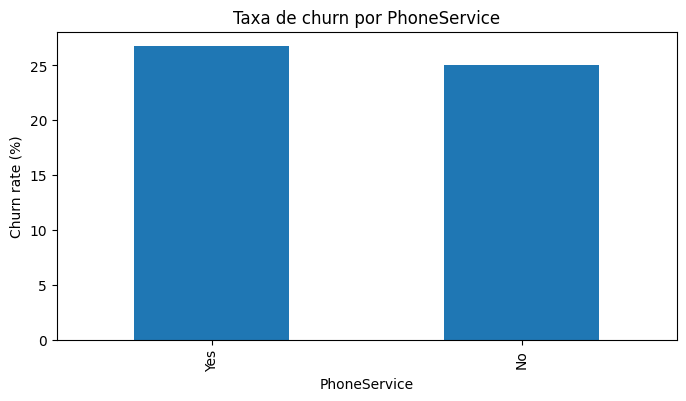


Churn rate por categoria em: MultipleLines
Churn                    No        Yes
MultipleLines                         
Yes               71.351534  28.648466
No                74.918759  25.081241
No phone service  75.000000  25.000000


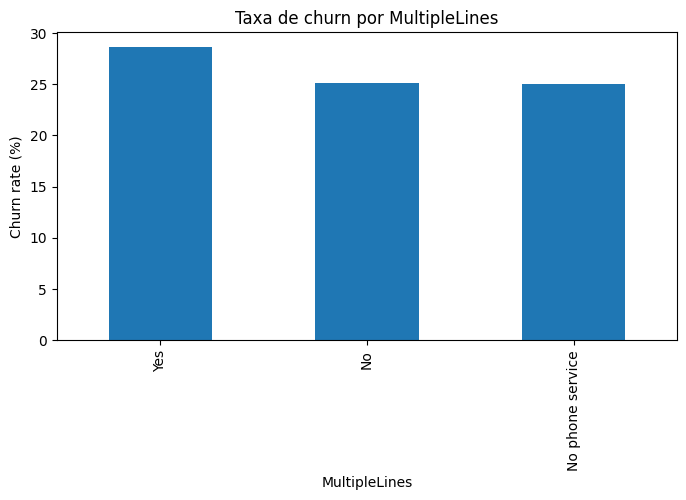


Churn rate por categoria em: InternetService
Churn                   No        Yes
InternetService                      
Fiber optic      58.107235  41.892765
DSL              81.001656  18.998344
No               92.565789   7.434211


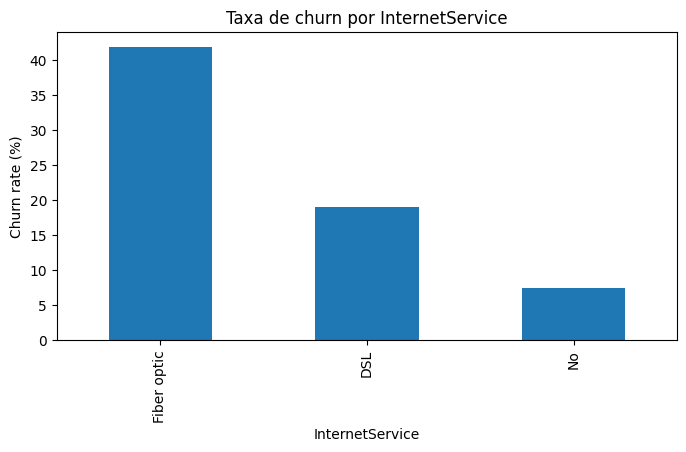


Churn rate por categoria em: OnlineSecurity
Churn                       No        Yes
OnlineSecurity                           
No                   58.221333  41.778667
Yes                  85.359801  14.640199
No internet service  92.565789   7.434211


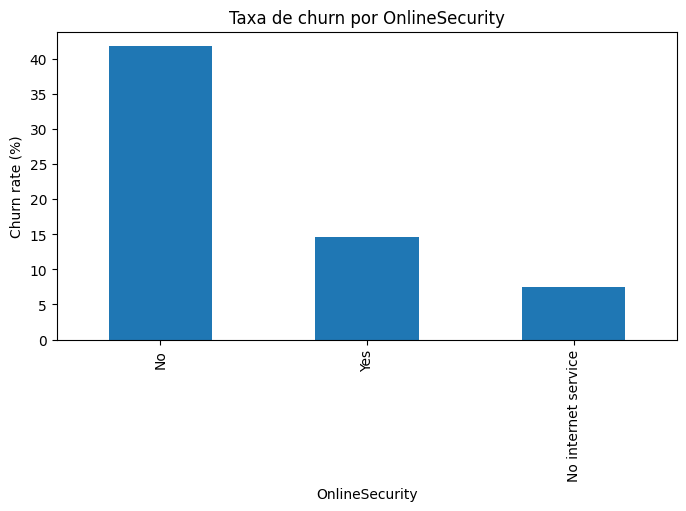


Churn rate por categoria em: OnlineBackup
Churn                       No        Yes
OnlineBackup                             
No                   60.058309  39.941691
Yes                  78.432990  21.567010
No internet service  92.565789   7.434211


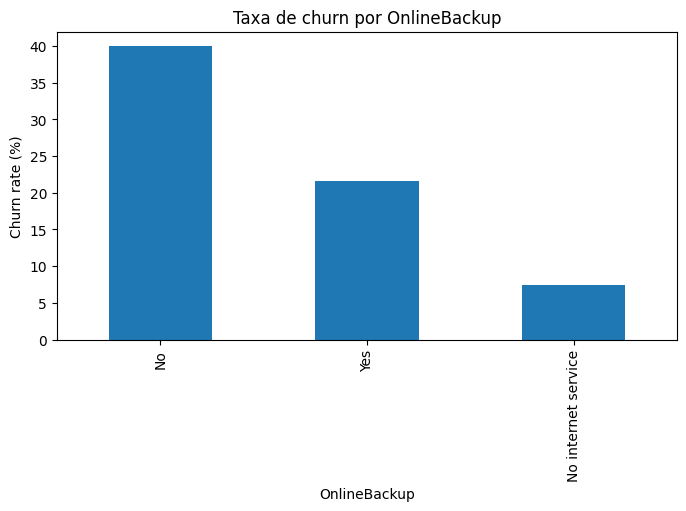


Churn rate por categoria em: DeviceProtection
Churn                       No        Yes
DeviceProtection                         
No                   60.859729  39.140271
Yes                  77.460711  22.539289
No internet service  92.565789   7.434211


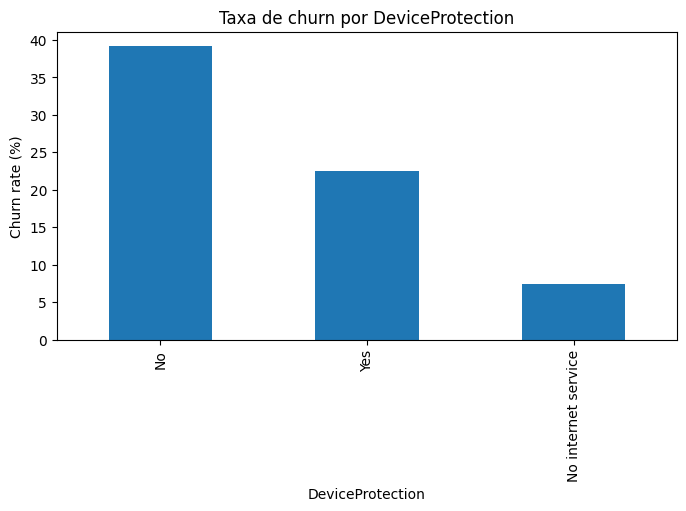


Churn rate por categoria em: TechSupport
Churn                       No        Yes
TechSupport                              
No                   58.352535  41.647465
Yes                  84.803922  15.196078
No internet service  92.565789   7.434211


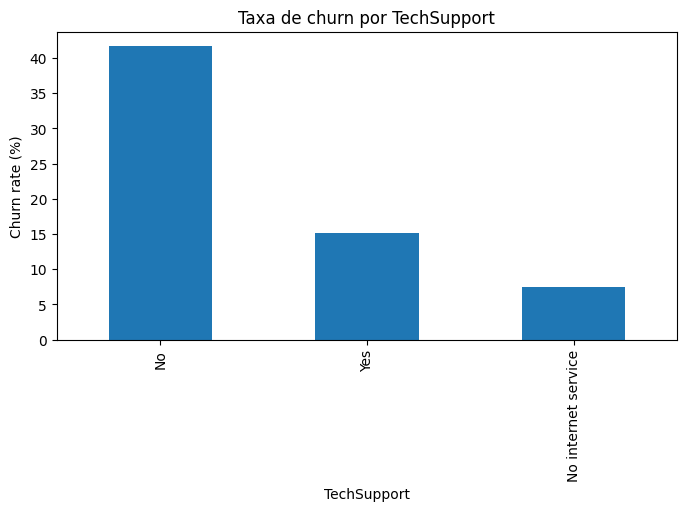


Churn rate por categoria em: StreamingTV
Churn                       No        Yes
StreamingTV                              
No                   66.464934  33.535066
Yes                  69.885313  30.114687
No internet service  92.565789   7.434211


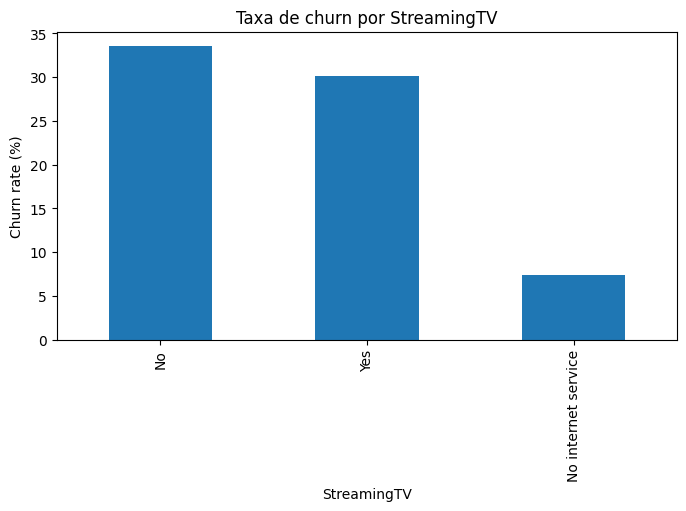


Churn rate por categoria em: StreamingMovies
Churn                       No        Yes
StreamingMovies                          
No                   66.271125  33.728875
Yes                  70.047602  29.952398
No internet service  92.565789   7.434211


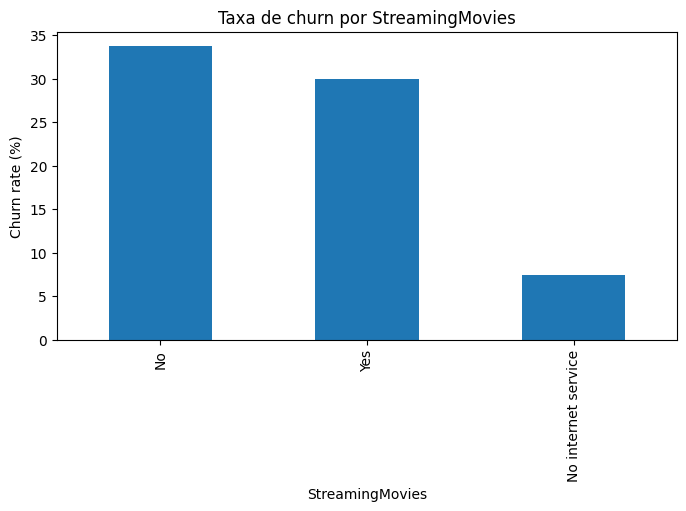


Churn rate por categoria em: Contract
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


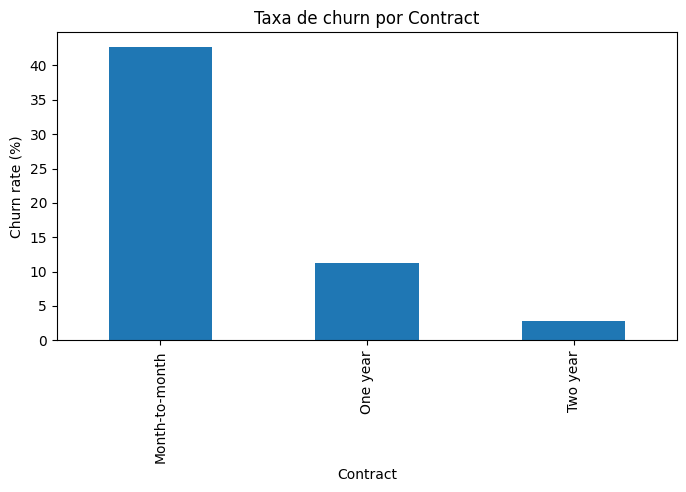


Churn rate por categoria em: PaperlessBilling
Churn                    No        Yes
PaperlessBilling                      
Yes               66.410749  33.589251
No                83.624302  16.375698


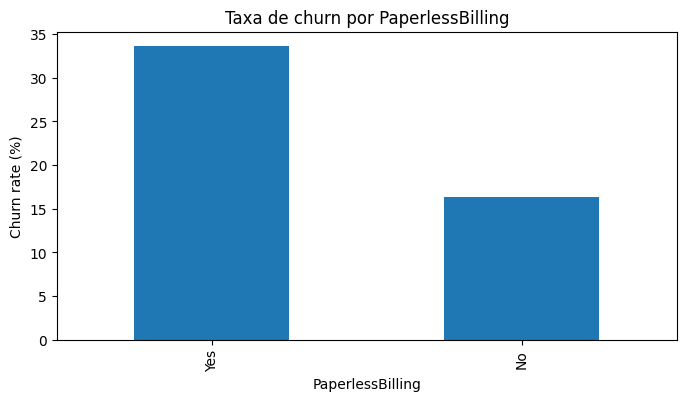


Churn rate por categoria em: PaymentMethod
Churn                             No        Yes
PaymentMethod                                  
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123


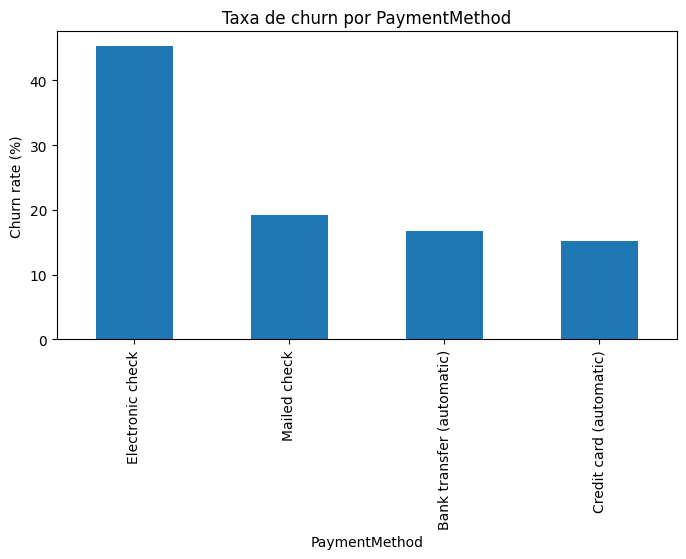

In [66]:
# taxa de churn para as variáveis categóricas
cat_feats = [col for col in df.columns if df[col].dtype == 'object' and col not in ['customerID', 'Churn']]

for col in cat_feats:
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    ct = ct.sort_values(by='Yes', ascending=False).head()
    print(f"\nChurn rate por categoria em: {col}")
    print(ct)

    plt.figure(figsize=(8, 4))
    ct['Yes'].plot(kind='bar')
    plt.title(f'Taxa de churn por {col}')
    plt.ylabel('Churn rate (%)')
    plt.xlabel(col)
    plt.show()

<h3>A visualisação grafica da taxa de cancelamento pode fornecer dados importantes em relação ao tipo de usuário que tem a maior tendencia a cancelar o serviço e quais serviços ofereçem a maior retenção de usuário, ou não influênciam na decisão de cancelamento</h3>

<h3>Usuários classificados como SeniorCitizen tem maior taxa de cancelamento.</h3>
<h3>Usuários com parceiros tem menor taxa de cancelamento</h3>
<h3>Usuários com depêndentes tem menor taxa de cancelamento</h3>
<h3>Do serviço de internet usuários com fibra-óptica tem maior taxa de cancelamento, aproximadamente o dobro.</h3>
<h3>Usuários com plano mensal tem aproximadamente 3,8 vezes a taxa de cancelamento de usuários com plano anual, e 15 vezes de usuários com plano a cada dois anos</h3>
<h3>Usuários com meios de cobrança eletronicos tem uma maior taxa de cancelamento</h3>

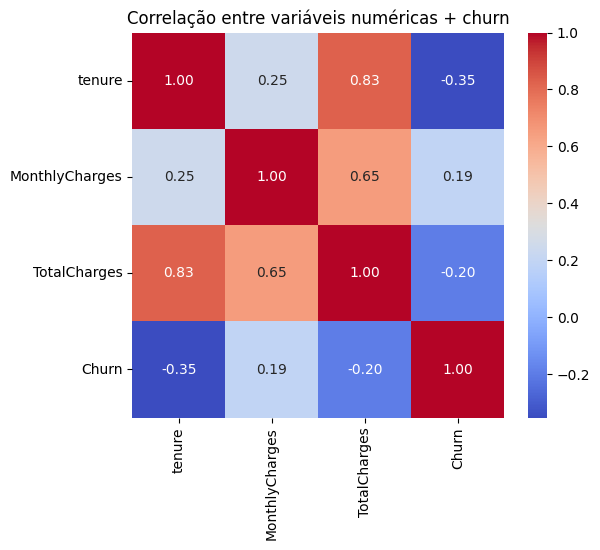


Correlação com churn:
Churn             1.000000
MonthlyCharges    0.192858
TotalCharges     -0.199484
tenure           -0.354049
Name: Churn, dtype: float64


In [67]:
# Matriz de correlação (apenas com variáveis numéricas)
corr = df[num_feats + ['Churn']].copy()
corr['Churn'] = corr['Churn'].map({'No': 0, 'Yes': 1})
mat = corr.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre variáveis numéricas + churn')
plt.show()

print("\nCorrelação com churn:")
print(mat['Churn'].sort_values(ascending=False))

<h3>A matriz de correlação refoça a análise obtida ao obter as estatísticas dos valores numéricos</h3>
<h3>Tenure X Churn: -0,35. Indica que usuários novos (com tenure baixo) tem a maior tendencia a cancelar o seerviço</h3>
<h3>MonthlyCharges X Churn: 0.19. Indica que usuários com planos mensais mais caros tema a tendencia maior a cancelar o serviço</h3>
<h3>TotalCharges: -0.19. Reforça a ideia de que usuários que estão a mais tempo na plataforma estão menos propensos a cancelar o serviço</h3>


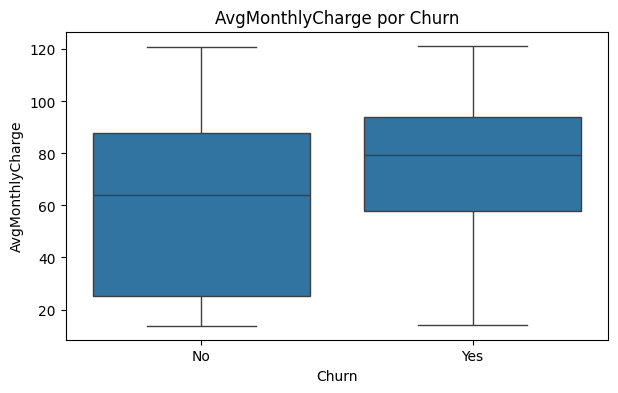

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5163.0,61.312024,31.142619,13.775,25.355303,64.040385,87.762170,120.74918
Yes,1869.0,74.433154,24.961209,14.150,57.975000,79.312500,93.933784,121.40000


In [68]:
# plot do custo mensal médio e taxa de churn
df['AvgMonthlyCharge'] = df['TotalCharges'] / np.where(df['tenure']>0, df['tenure'], 1)

plt.figure(figsize=(7, 4))
sns.boxplot(x='Churn', y='AvgMonthlyCharge', data=df)
plt.title('AvgMonthlyCharge por Churn')
plt.show()


df.groupby('Churn')['AvgMonthlyCharge'].describe()

<h3>O boxplot acima reforça novamente a ideia que usuários com custos mensais mais altos tem a maior tendencia a cacelar o serviço</h3>

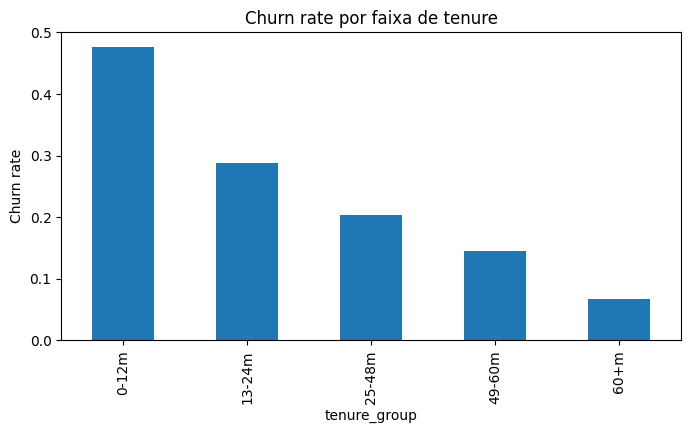

Churn,No,Yes
tenure_group,,
0-12m,0.523218,0.476782
13-24m,0.712891,0.287109
25-48m,0.796110,0.203890
49-60m,0.855769,0.144231
60+m,0.933902,0.066098


In [69]:
# Análise de Churn por grupo de Tenure (tempo de contrato)
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, np.inf],
                            labels=['0-12m', '13-24m', '25-48m', '49-60m', '60+m'])

churn_by_tenure = df.groupby('tenure_group',observed=False)['Churn'].value_counts(normalize=True).unstack()


churn_by_tenure['Yes'].plot(kind='bar', figsize=(8, 4))
plt.title('Churn rate por faixa de tenure')
plt.ylabel('Churn rate')
plt.show()

churn_by_tenure

<h3>O gráfico de churn por agrupamento de Tenure (tempo de contrato) mostra a alta taxa de cancelamento nos usuários com menor tempo de contrato</h3>

In [70]:
#retonando a variavel SeniorCitizen como inteira
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)


In [71]:
# tratamento das variáveis não-numéricas
le = LabelEncoder()

carac_clientes = ['gender','SeniorCitizen','Partner','Dependents']
services_list = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
contrato_pagamento = ['tenure','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']

df = df.drop(columns=['customerID'])
df["gender_cod"] = le.fit_transform(df["gender"])
df["partner_cod"] = le.fit_transform(df["Partner"])
df["dependents_cod"] = le.fit_transform(df["Dependents"])
df["phone_service_cod"] = le.fit_transform(df["PhoneService"])
df["mult_lines_cod"] = le.fit_transform(df["MultipleLines"])
df["internet_service_cod"] = le.fit_transform(df["InternetService"])
df["online_security_cod"] = le.fit_transform(df["OnlineSecurity"])
df["online_backup_cod"] = le.fit_transform(df["OnlineBackup"])
df["device_protection_cod"] = le.fit_transform(df["DeviceProtection"])
df["tech_support_cod"] = le.fit_transform(df["TechSupport"])
df["streaming_tv_cod"] = le.fit_transform(df["StreamingTV"])
df["streaming_movies_cod"] = le.fit_transform(df["StreamingMovies"])
df["contract_cod"] = le.fit_transform(df["Contract"])
df["paperless_billing_cod"] = le.fit_transform(df["PaperlessBilling"])
df["payment_method_cod"] = le.fit_transform(df["PaymentMethod"])
df["churn_cod"] = le.fit_transform(df["Churn"])

In [72]:
# utilizando todas as variaveis do dataset para treinamento do modelo
df_servicos = df.drop(columns=['tenure_group','Churn'] + carac_clientes + services_list + contrato_pagamento)

In [73]:
# treinando
model = LogisticRegression()
model.fit(df_servicos.drop(columns=['churn_cod']), df_servicos['churn_cod'])

LogisticRegression()

In [74]:
# probabilidade de cancelamento
df_churn_prob = pd.DataFrame()

# valores de cancelamento para assercao do resultado do modelo
df_churn_prob['churn'] = df['churn_cod']

# calculo da predicao do modelo
df_churn_prob['churn_predict'] = model.predict(df_servicos.drop(columns=['churn_cod']))
df_churn_prob['churn_prob'] = model.predict_proba(df_servicos.drop(columns=['churn_cod']))[:, 1]

# classificacao de risco de cancelamento
df_churn_prob['risk_churn_code'] = pd.cut(
    df_churn_prob['churn_prob'],
    bins=[0, 0.3, 0.5, 0.7, 1],
    labels=['baixo', 'médio', 'alto', 'muito alto']
)

<Figure size 600x600 with 0 Axes>

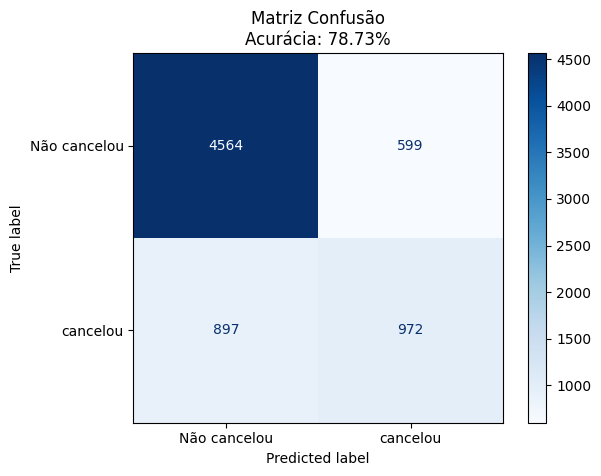

In [79]:
# matriz confusao - para descobrir o quanto o modelo errou em comparacao aos resultados reais

cm = confusion_matrix(df_churn_prob['churn'], df_churn_prob['churn_predict'])
acc = accuracy_score(df_churn_prob['churn'], df_churn_prob['churn_predict'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não cancelou','cancelou'])
plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Matriz Confusão\nAcurácia: {acc:.2%}')
plt.grid(False)
plt.show()

In [76]:
#relatório de clssification report
relatorio = classification_report(df_servicos['churn_cod'],df_churn_prob['churn_predict'], output_dict=True)
relatorio = pd.DataFrame(relatorio).transpose()
relatorio

,precision,recall,f1-score,support
0,0.835744,0.883982,0.859187,5163.000000
1,0.618714,0.520064,0.565116,1869.000000
accuracy,0.787258,0.787258,0.787258,0.787258
macro avg,0.727229,0.702023,0.712152,7032.000000
weighted avg,0.778061,0.787258,0.781027,7032.000000


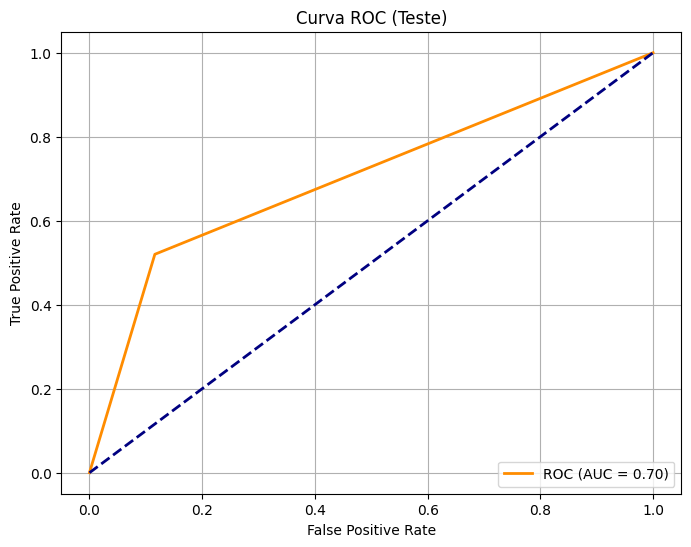

In [77]:
#curva roc

fpr, tpr, thresholds = roc_curve(df_servicos['churn_cod'],df_churn_prob['churn_predict'])
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (Teste)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

C:\Users\darrye\AppData\Local\Temp\ipykernel_9720\918131301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_churn_prob, x='risk_churn_code', order=['baixo', 'médio', 'alto', 'muito alto'], palette='coolwarm')


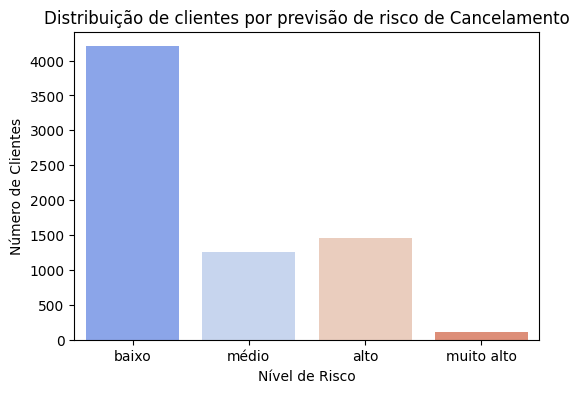

In [78]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_churn_prob, x='risk_churn_code', order=['baixo', 'médio', 'alto', 'muito alto'], palette='coolwarm')
plt.title("Distribuição de clientes por previsão de risco de Cancelamento")
plt.xlabel("Nível de Risco")
plt.ylabel("Número de Clientes")
plt.show()